# Pré - Processamento

### **TÓPICOS**:

- Conversão de imagem para tons de cinza
- Coversão da imagem para RGB
- Dissertação a equalização de histograma (Histograma de Gradientes Orientados (HOG) )
- Borramento (filtro de mediana)
- Limiarização
- Método de Otsu
- Operações morfológicas (dilatação e erosão)
- Detector de bordas (Canny)
- Hough
- Largura do traçado (Stroke width)
- MSER (Maximally Stable Extremal Regions)

### **IMPORTS**

In [1]:
# Data manipulation
import numpy as np

# Image manipulation
import cv2
import imutils
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# OCR packages
import pytesseract
from paddleocr import PaddleOCR, draw_ocr

In [2]:
# Imagem original
img = cv2.imread("img_cnh.jpg")

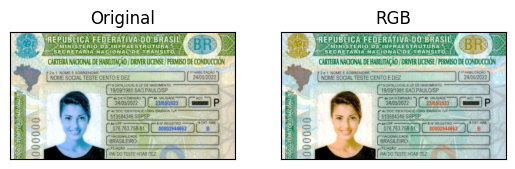

In [3]:
# Converter a imagem para RGB
img_rgb = cv2.cvtColor(
    img, 
    cv2.COLOR_BGR2RGB
    )

plt.subplot(121),
plt.imshow(img),
plt.title('Original')

plt.xticks([]), 
plt.yticks([])

plt.subplot(122),
plt.imshow(img_rgb),
plt.title('RGB')

plt.xticks([]), 
plt.yticks([])

plt.show()

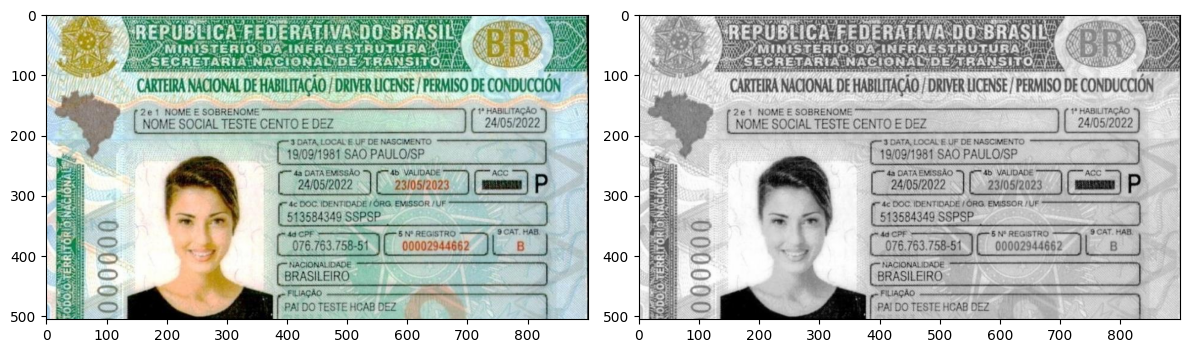

In [4]:
# Converter a imagem para cinza
img_gray = cv2.cvtColor(
    img, 
    cv2.COLOR_BGR2GRAY
)

fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

plt.tight_layout()

#### HOG WITH SCIKIT-IMAGES

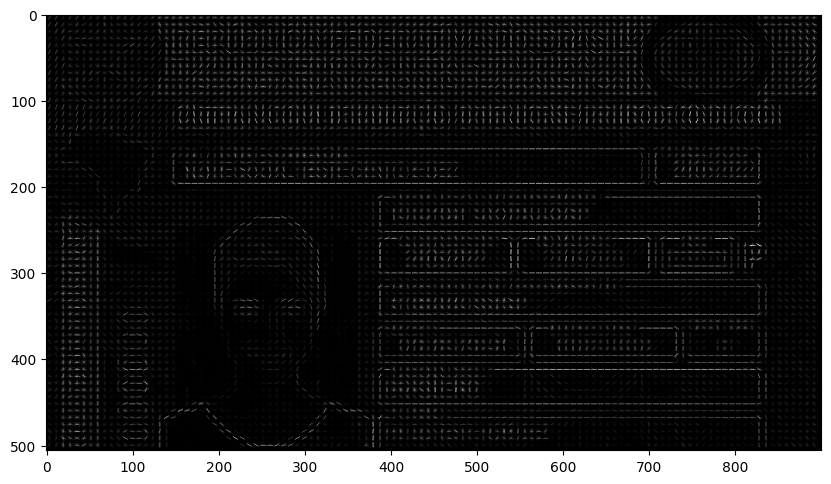

In [5]:
fd, hog_image = hog(image=img_gray, visualize=True) #multichannel=True
plt.figure(figsize=(10,10))
plt.imshow(hog_image, cmap="gray")

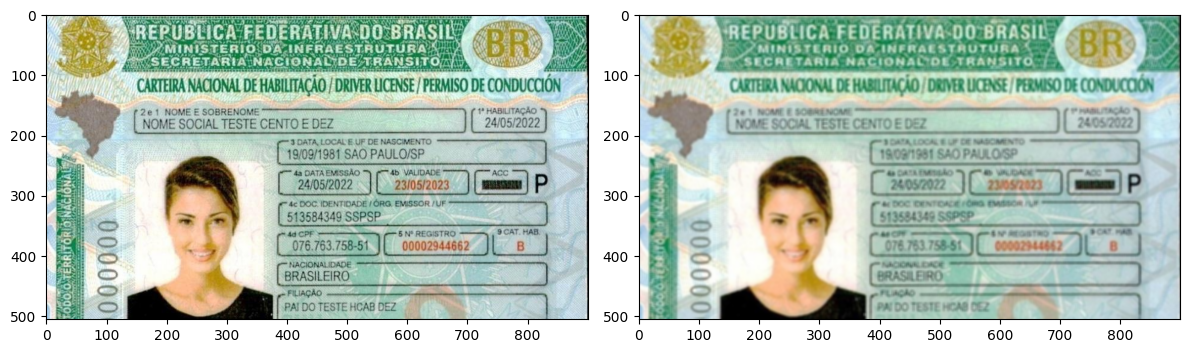

In [6]:
# Borramento 
bor = cv2.blur(
    img,
    (5,5)
)

fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(bor, cv2.COLOR_BGR2RGB))

plt.tight_layout()

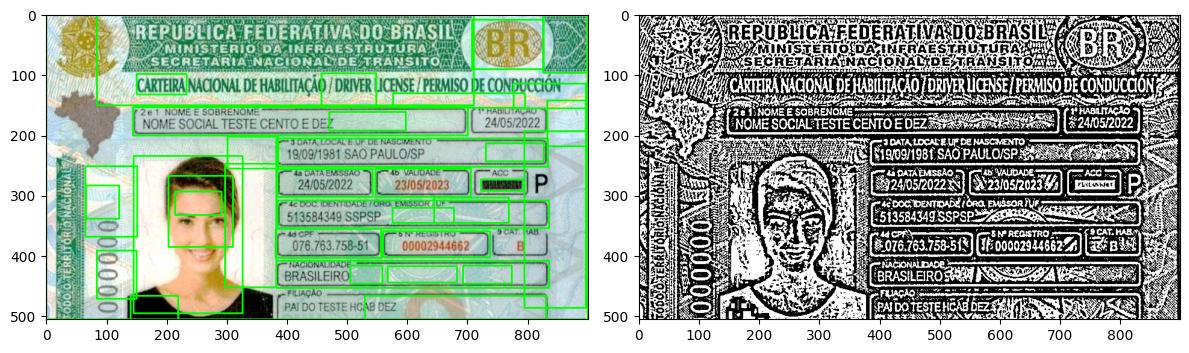

In [7]:
#Adaptive Thresh Mean
img_gray *= 255
img_gray = np.uint8(img_gray)
adap = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)


# Binalização da imagem 
ret, thresh = cv2.threshold(adap, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Detecção das regiões de interesse
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Seleção das regiões de interesse com base na área
ROIs = []
for cnt in contours:
    a = cv2.contourArea(cnt)
    if a > 1000:
        x,y,w,h = cv2.boundingRect(cnt)
        ROIs.append((x,y,w,h))

# Dectectar em formato de retângulo
for (x,y,w,h) in ROIs:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar a imagem com a detecção e após ser tratada 
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(adap, cv2.COLOR_BGR2RGB))

plt.tight_layout()

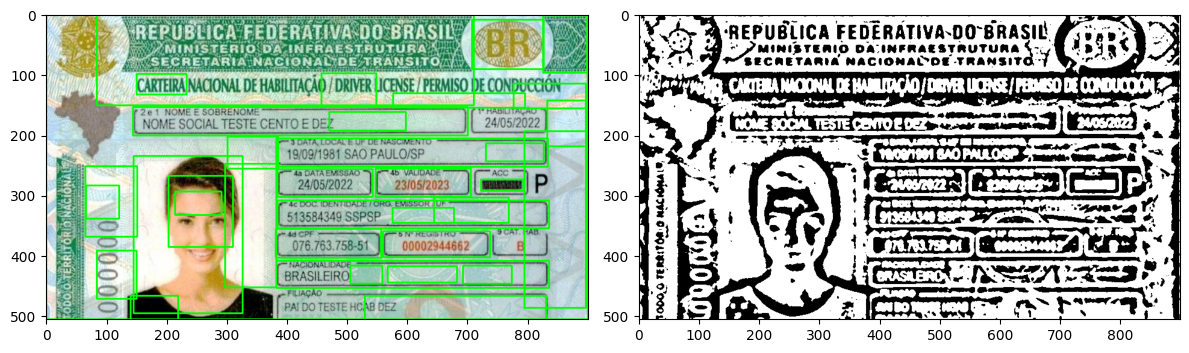

In [8]:
# Limiarização Global
blurred = cv2.GaussianBlur(img_gray, (7, 7), 0)

lim = cv2.adaptiveThreshold(
    blurred, 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    31, 
    10
)

fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(lim, cv2.COLOR_BGR2RGB))

plt.tight_layout()


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/thresh.cpp:1555: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


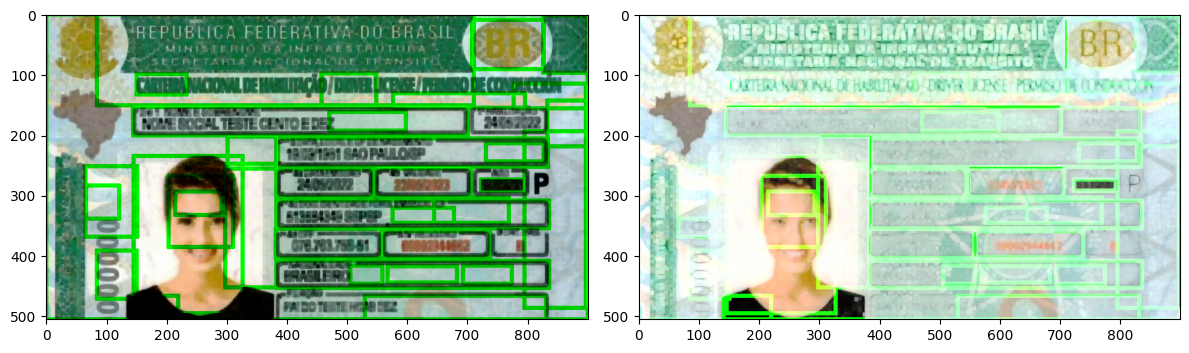

In [9]:
# Operações morfológicas (dilatação e erosão) 
kernel = np.ones((5, 5), np.uint8)

img_dilata = cv2.dilate(img, kernel, iterations=1)
img_ero = cv2.erode(img, kernel, iterations=1)

fig, ax = plt.subplots(
    1,
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img_ero, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_dilata, cv2.COLOR_BGR2RGB))

plt.tight_layout()

# Binalização da imagem 
ret, thresh = cv2.threshold(img_ero, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Detecção das regiões de interesse
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Seleção das regiões de interesse com base na área
ROIs = []
for cnt in contours:
    a = cv2.contourArea(cnt)
    if a > 1000:
        x,y,w,h = cv2.boundingRect(cnt)
        ROIs.append((x,y,w,h))

# Dectectar em formato de retângulo
for (x,y,w,h) in ROIs:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar a imagem com a detecção e após ser tratada 
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_ero, cv2.COLOR_BGR2RGB))

plt.tight_layout()

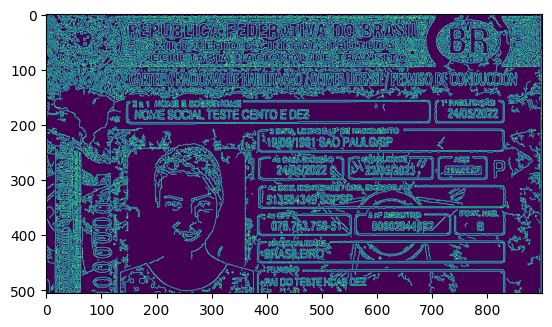

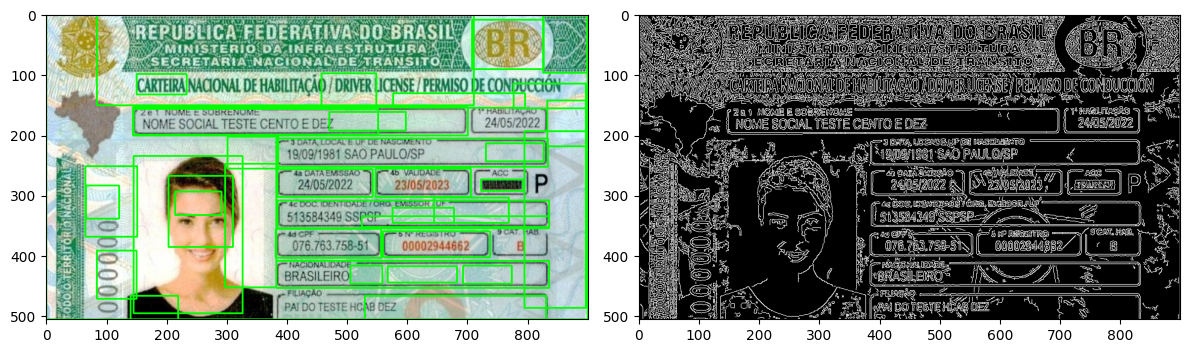

In [10]:
# Detector de bordas (Canny)
bor = cv2.Canny(img_gray, 50, 150)
plt.imshow(bor)

# Binalização da imagem 
ret, thresh = cv2.threshold(bor, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Detecção das regiões de interesse
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Seleção das regiões de interesse com base na área
ROIs = []
for cnt in contours:
    a = cv2.contourArea(cnt)
    if a > 1000:
        x,y,w,h = cv2.boundingRect(cnt)
        ROIs.append((x,y,w,h))

# Dectectar em formato de retângulo
for (x,y,w,h) in ROIs:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar a imagem com a detecção e após ser tratada 
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(bor, cv2.COLOR_BGR2RGB))

plt.tight_layout()

In [ ]:
ocr = PaddleOCR()

result = ocr.ocr(img_gray,cv2.COLOR_BGR2RGB)
result


In [ ]:
# Stroke width
result, draw, bbs = cv2.text.detectTextSWT(
    img,
    dark_on_light = True 
)

In [ ]:
plt.imshow(img)
plt.imshow(draw)
plt.show()

In [ ]:
dst = cv2.addWeighted(img, 0.5, draw, 0.7, 0)
plt.imshow(dst)

In [ ]:
img_bbs = img.copy()

for bb in bbs[0]:
    #print(bb)
    img_bbs = cv2.rectangle(
        img_bbs,
        (bb[0], bb[1]),
        (bb[0]+bb[2], bb[1]+bb[3]),
        (0, 255, 0),
        2
    )

plt.imshow(img_bbs)


In [ ]:
orig = img.copy()
if imutils.is_cv2():
    detector = cv2.FeatureDetector_create("MSER")
    kps = detector.detect(img_gray)
  
# otherwise detect MSER keypoints in the image for OpenCV 3+
else:
    detector = cv2.MSER_create()
    kps = detector.detect(img_gray, None)
  
print("# of keypoints: {}".format(len(kps)))
  
# loop over the keypoints and draw them
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(img, (x, y), r, (0, 255, 255), 2)
  
# show the image
cv2.imshow("Images", np.hstack([orig, img]))
cv2.waitKey(0)